<a href="https://colab.research.google.com/github/cesar-claros/Intro_DL/blob/main/Intro_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN A DEEP LEARNING**
#---------------------------------------------------------
## **CONTENIDO**
## 1. Precursores de las redes neuronales
## 2. Formalización del problema de aprendizaje
## 3. El perceptrón y su algoritmo de entrenamiento
## 4. Implementación con datos separables linealmente (Iris dataset)
## 5. Consideraciones para datos no separables linealmente
## 6. Ingeniería de características para aprendizaje automático
## 7. Perceptrón multicapa y aprendizaje automático *end-to-end*
## 8. Ejemplo de clasificación multiclase con MLP (MNIST dataset)
## 9. Arquitectura LeNet


# 1.&nbsp;Precursores de las redes neuronales

# 1.1. Neuronas artificales y el modelo de McCulloch-Pitts (1943)
Abstracciones inspiradas en el comportamiento de las células nerviosas.
<img src="https://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_neuron.png" alt="neuron" width="1000px">
Fuente: [Single-Layer Neural Networks and Gradient Descent](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html),


Una combinación entre maquinas de estado finito, elementos de decisión lineales con umbrales y representaciones lógicas.
<img src="https://asset-pdf.scinapse.io/prod/2046606639/figures/figure-2.jpg" alt="mp_model" width="1000px">
*Net explaining the heat illusion. Neuron 3 (heat sensation) fires if and only if it receives two inputs, represented by the lines terminating on its body. This happens when either neuron 1 (heat reception) fires or neuron 2 (cold reception) fires once and then immediately stops firing. When neuron 2 fires twice in a row, the intermediate (unnumbered) neurons excite neuron 4 rather than neuron 3, generating a sensation of cold.*

"The original purpose of McCulloch and Pitts’s technique for
designing nets was to explain mental phenomena. As an example,
they offered an explanation of a well-known heat illusion by constructing an appropriate net. A cold object touching the skin normally causes a sensation of cold, but if it is held for a very brief time and then removed, it can cause a sensation of heat. In designing their net, McCulloch and Pitts reasoned as follows. They started from the known physiological fact that there are different kinds of receptors affected by heat and cold, and they assumed that there are neurons whose activity ‘‘implies a sensation’’ of heat. Then, they assigned one neuron to each function: heat reception, cold reception, heat sensation, and cold sensation. Finally, they observed that the heat illusion corresponded to the following relations between three neurons: the heat-sensation neuron fires either in response to the heat receptor or to a brief activity of the cold receptor."

Fuente: [THE FIRST COMPUTATIONAL THEORY OF MIND AND BRAIN: A CLOSE LOOK AT MCCULLOCH AND PITTS'S ''LOGICAL CALCULUS OF IDEAS IMMANENT IN NERVOUS ACTIVITY''](https://www.scinapse.io/papers/2046606639),


# 1.2. Modelo de Rosenblatt (1958)
Ilustración basada en las conexiones naturales del cerebro desde la retina al área visual.
<img src="https://news.cornell.edu/sites/default/files/styles/breakout/public/2019-09/0925_rosenblatt4.jpg?itok=SQlcmwIR" alt="perceptron" width="1000px">
Fuente: [Professor’s perceptron paved the way for AI – 60 years too soon](https://news.cornell.edu/stories/2019/09/professors-perceptron-paved-way-ai-60-years-too-soon)


# 1.3. Observaciones de Minksy y Papert (1969)

Minksy y Papert escriben el libro titulado *Perceptron* en 1969, donde mencionan que el perceptrón no es capaz de aprender la función XOR.
<img src="https://qph.fs.quoracdn.net/main-qimg-a6c557af4280d1f85cacc66e048e82f3" alt="xor" width="1000px">
Fuente: [Why can’t Perceptron learn XOR?](https://www.quora.com/Why-can-t-Perceptron-learn-XOR)

Sin embargo, también nota que multiples perceptrones serían capaces de resolver el problema.
<img src="https://qph.fs.quoracdn.net/main-qimg-a54247baa0862fd56a4c87cb608d4556-mzj" alt="mlp" width="1000px">
Fuente: [Why did it take so long for people to realize that the perceptron can be multilayered to overcome the limitations presented by Minsky and Pappert?](https://www.quora.com/Why-did-it-take-so-long-for-people-to-realize-that-the-perceptron-can-be-multilayered-to-overcome-the-limitations-presented-by-Minsky-and-Pappert)


# 2.&nbsp;Formalización del problema de aprendizaje
Los siguientes elementos componen el problema de aprendizaje:
* Entradas $\mathbf{x}\in\mathcal{X}$, donde $\mathcal{X}$ es el espacio de entrada.
    * Ejemplo:
    \begin{align}
    \mathbf{x}&=(x_1,x_2)=(0,0)\\
    \mathcal{X}&=\big\{(0,0),(0,1),(1,0),(1,1)\big\}
    \end{align}
* Salidas $y\in\mathcal{Y}$, donde $\mathcal{Y}$ es el espacio de salida.
    * Ejemplo:
    \begin{align}
    y&=1\\
    \mathcal{Y}&=\left\{1,-1\right\}
    \end{align}
* Función objetivo a ser aprendida $f^\star:\mathcal{X}\rightarrow\mathcal{Y}$.
    * Ejemplo: $f^\star=x_1\oplus x_2$
    
| $x_1$ | $x_2$ | $f^\star$ |
| :---  | :----:|  ---:     |
| 0     | 0     | 0         |
| 0     | 1     | 1         |
| 1     | 0     | 1         |
| 1     | 1     | 0         |

* Datos $\mathcal{D}=\{(\mathbf{x}_1,y_1), (\mathbf{x}_2,y_2),\dots,(\mathbf{x}_N,y_N)\}$, donde $N$ representa la cantidad de datos observados
    * Ejemplo:
    \begin{equation}
    \mathcal{D}=\bigg\{\big(\left(1,1\right),1\big), \big(\left(0,0\right),1\big),\big(\left(1,0\right),0\big)\bigg\}
    \end{equation}

* Función hipótesis $h\in\mathcal{H}$, donde $\mathcal{H}$ es el conjunto de hipótesis.
     * Ejemplo:
    \begin{align}
    h_{\mathbf{w},b}(x)&=\sum_{i=1}^{d}{w_ix_i}+b,\quad\mathbf{w}=\{w_1,w_2,\dots,w_d\}\quad \text{(predictor lineal)}\\
    \mathcal{H}&=\left\{h_{\mathbf{w},b}:\mathbf{w}\in\mathbb{R}^d,b\in\mathbb{b} \right\}
    \end{align}

# 2.1. Esquema básico de aprendizaje automático
<img src="https://drive.google.com/uc?id=19n8qW6w7S24qKfn7-GbmDAwmHUjfsKIe" alt="mlp" width="1000px" height="700px">

Fuente: [COMPONENTS OF LEARNING](https://work.caltech.edu/library/012.pdf) *(ligeramente modificado)

# 3.&nbsp;El perceptrón y su algoritmo de entrenamiento
El perceptrón implementa la siguiente función:
\begin{equation}
h_{\mathbf{w}}(x)=sign\left(\sum_{i=1}^{d}{w_ix_i}+w_0\right),\quad\mathbf{w}=\left[w_1,w_2,\dots,w_d\right]
\end{equation}
De manera vectorial, puede escribirse de la siguiente manera:
\begin{equation}
h_{\mathbf{w}}(x)=sign\left({\mathbf{w}^T\mathbf{x}}\right)
\end{equation}
donde $\mathbf{w}=\left[w_0, w_1,w_2,\dots,w_d\right]$ y $\mathbf{x}=\left[1,x_1,x_2,\dots,x_d\right]$.


<img src="https://drive.google.com/uc?id=1lQZslwXqkjR9XJy3SE3mCdKpQoa6RGaX" alt="mlp" width="1000px">



El algoritmo de entramiento del perceptrón (Perceptron Learning Algorithm) se muestra a continuación:
<img src="https://drive.google.com/uc?id=1FUOaFBY88RkaGan0IFtSmT2T72ivNzAE" alt="mlp" width="1000px">
Fuente: [PERCEPTRON](https://work.caltech.edu/library/013.pdf)


# 4.&nbsp;Implementación con datos separables linealmente (Iris dataset)
Iris contiene muestras de flores descritas cada una por 4 atributos: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Las observaciones están clasificadas en 3 categorias: Iris Setosa, Iris Versicolor e Iris Virginica.

Iris Setosa             |  Iris Versicolor          |  Iris Virginica
:-------------------------:|:-------------------------:|:-------------------------:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/440px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="drawing" width="300"/>  |  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/440px-Blue_Flag%2C_Ottawa.jpg" alt="drawing" width="300"/> |  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Iris_virginica_2.jpg/440px-Iris_virginica_2.jpg" alt="drawing" width="300"/>

In [ ]:
# Import libraries
import os
import random
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython import display
import tensorflow as tf

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# download and convert the csv into a DataFrame
df = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


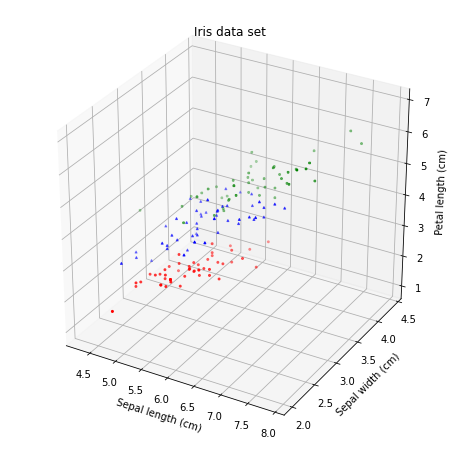

In [ ]:
# Disect data into chunks filtered by their class
X1 = df.loc[(df['class']=='Iris-setosa'), ('sepal length', 'sepal width', 'petal length')].values
X2 = df.loc[(df['class']=='Iris-versicolor'), ('sepal length', 'sepal width', 'petal length')].values
X3 = df.loc[(df['class']=='Iris-virginica'), ('sepal length', 'sepal width', 'petal length')].values
# Set figure canvas and size
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
# Set titles
ax.set_title('Iris data set')
ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Sepal width (cm)")
ax.set_zlabel("Petal length (cm)")
# Plot the samples
ax.scatter(X1[:,0], X1[:,1], X1[:,2], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(X2[:,0], X2[:,1], X2[:,2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")
ax.scatter(X3[:,0], X3[:,1], X3[:,2], color='green', 
           marker='x', s=4, edgecolor='green', label="Iris Virginica")

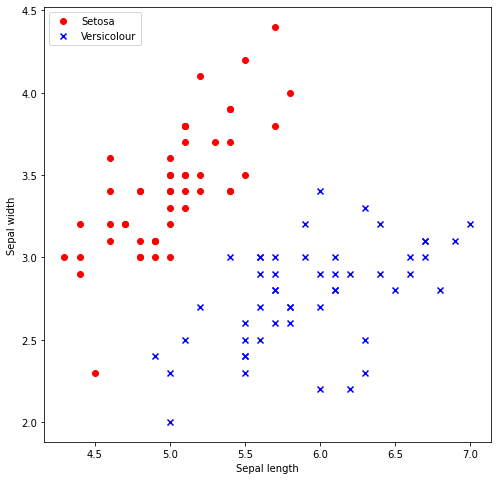

In [ ]:
# Set figure canvas and size
fig = plt.figure(figsize=(8,8))
# plot Iris Setosa samples
plt.scatter(X1[:,0], X1[:,1], color='red', marker='o', label='Setosa')
# plot Iris Versicolour samples
plt.scatter(X2[:,0], X2[:,1], color='blue', marker='x', label='Versicolour')
# show the legend
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(loc='upper left')

In [ ]:
# Arrange dataset for PLA
# set the output labels for each class in a vector
y1 = np.ones((len(X1),1))
y2 = -1*np.ones((len(X2),1))
y = np.concatenate((y1,y2), axis=0)
# set observations in a matrix
X = np.concatenate((X1[:,:2],X2[:,:2]), axis=0)
# add extra 1's to X
X = np.concatenate((np.ones((len(X),1)), X), axis=1)
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 4.1. Funciones para implementar PLA
* Perceptrón: $h_{\mathbf{w}_t}(\mathbf{x}_n)=sign(\mathbf{w}_t^\intercal\mathbf{x}_n)$,

* Función de actualización de los pesos: $\mathbf{w}_{t+1}\leftarrow\mathbf{w}_t+y_n\mathbf{x}_n$,

* Función de costo: $\ell_{0-1}(h_{\mathbf{w}_t},\mathbf{x}_n,y_n)=\mathbb{I}_{ \{h_{\mathbf{w}_t}(\mathbf{x}_n)\neq y_n\}}= \begin{cases}
1, \text{ si $\{h_{\mathbf{w}_t}(\mathbf{x}_n)\neq y_n\}$ ocurre}\\
0, \text{ de otra manera} 
\end{cases}$,

* Función de costo total: $L_{0-1}(h,\mathbf{X},\mathbf{y})=\frac{\sum_{i=1}^{N} \ell_{0-1}(h,\mathbf{x}_i,y_i) }{N}$,

donde:
\begin{align*}
\mathbf{x}_n&=\left[1,x_{1n},x_{2n},\dots,x_{dn}\right]\in\mathbb{R}^d,\quad n\in\{1,\dots,N\}\\
\mathbf{X}&=[\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N]^\intercal\in\mathbb{R}^{N\times d}\\
\mathbf{w}&=\left[w_0,w_1,w_2,\dots,w_d\right]\in\mathbb{R}^d\\
\mathbf{y}&=\left[y_1,y_2,\dots,y_N\right]\in\{-1,1\}^N
\end{align*}

In [ ]:
# IMPLEMENTATION
# perceptron definition
h = lambda w,x : np.sign(w.T@x)
# update function
update = lambda w,x,y : (w.T + y*x).T
# loss function
l_01 = lambda h,w,x,y : h(w,x.T).ravel() != y.ravel()
# total loss function
L_01 = lambda h,w,X,Y : np.sum(l_01(h,w,X,Y))/len(Y)

In [ ]:
def plot_decision_regions(x, y, h, w, ext=0.5):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 1].min() - ext, x[:, 1].max() + ext
    x2_min, x2_max = x[:, 2].min() - ext, x[:, 2].max() + ext
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    X = np.array([np.ones(len(xx1.ravel())), xx1.ravel(), xx2.ravel()])
    
    Z = h(w,X)
    Z = Z.reshape(xx1.shape)
    # Set figure canvas and size
    fig,ax = plt.subplots(figsize=(8,8))
    # plot the decision region...
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    y = y.ravel()
    for idx, c1 in enumerate(np.unique(y)):
        ax.scatter(x=x[y == c1, 1],
                    y=x[y == c1, 2], 
                    alpha=0.8, 
                    color=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        ax.set_title('Decision surface')
    return fig, ax

In [ ]:
# Seeding function
def init_seed(seed=12345):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [ ]:
# Initialization
# initial seed
seed = 3210
init_seed(seed)
# initial weight vector
w_init = np.random.normal(size=(3,1))

w_init = [[-1.8629537 ]
 [-0.50207461]
 [ 1.93421129]]
error= 0.4533333333333333


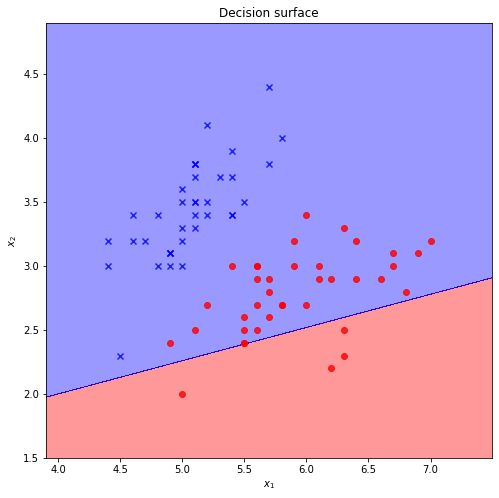

In [ ]:
plot_decision_regions(X_train, y_train, h, w_init)
print('w_init =', w_init)
error_tr = L_01(h, w_init, X_train, y_train)
print('error=', error_tr)

# 4.2. Algoritmo de entramiento

<img src="https://drive.google.com/uc?id=1HgWhNl9bjn1tEKfeCZuDjgKXqHcN18Dh" alt="mlp" width="1000px">

Fuente: [PERCEPTRON](https://work.caltech.edu/library/013.pdf)

<img src="https://drive.google.com/uc?id=15sS2-5Uqm-TXZFtx3uedo5GEIZGYwUKi" alt="mlp" width="1000px">


In [ ]:
# One epoch training definition
def train_epoch(X_train, y_train, h, w):
    for x_i, y_i in zip(X_train, y_train):
        if l_01(h,w,x_i,y_i): # h(x_i)!=y_i
            w = update(w, x_i, y_i) # (w.T + y_i*x_i).T # update function
    return w

In [ ]:
# Training procedure for PLA
def train_PLA(X_train, y_train, h, w, T=50):
    errors = []
    for t in range(T):
        error_tr = L_01(h, w, X_train, y_train)
        errors.append(error_tr)
        # Compute weight vector for one epoch
        w = train_epoch(X_train, y_train, h, w)
    return w, errors

w= [[-0.8629537 ]
 [-6.80207461]
 [12.33421129]]
error= 0.02666666666666667


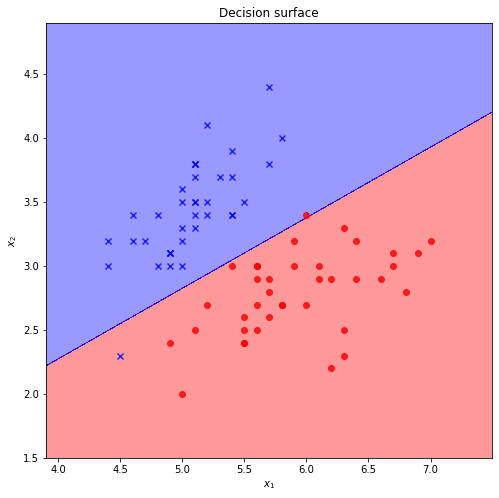

In [ ]:
# Compute weight vector for one epoch
w = train_epoch(X_train, y_train, h, w_init)
# Visualizing training procedure for one epoch
plot_decision_regions(X_train, y_train, h, w)
print('w=', w)
error_tr = L_01(h, w, X_train, y_train)
print('error=', error_tr)

In [ ]:
# Initialization
seed = 12345
init_seed(seed)
# set number of training iterations T
T = 50
# initial weight vector
w_init = np.random.normal(size=(3,1))
# Compute weight vector for T epochs
w, errors = train_PLA(X_train, y_train, h, w_init, T=T)

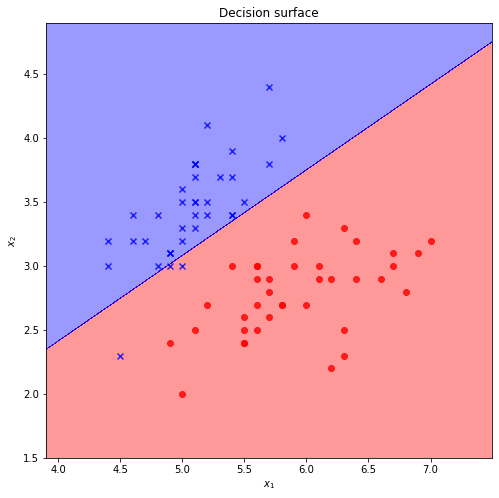

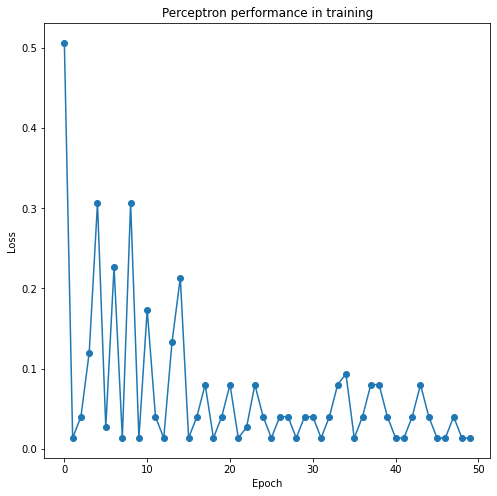

In [ ]:
# Plot perceptron performance
plot_decision_regions(X_train, y_train, h, w)
# Set figure canvas and size
fig, ax = plt.subplots(figsize=(8,8))
# Plot total loss per epoch
ax.plot(range(T), errors, marker='o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title("Perceptron performance in training")
plt.show()

# 4.3. Reajuste de las escalas
Debido a que las escalas son diferentes en cada dimension, un atributo pesa más que el otro cuando se actualizan los pesos $\mathbf{w}$:
\begin{equation}
    \mathbf{w}\leftarrow\mathbf{w}+y\mathbf{x}
\end{equation}
En estos casos es necesario reajustar las escalas de cada dimensión para evitar distorsionar la actualización de los pesos. Un procedimiento común es la estandarización:

\begin{equation}
X_{std} = \frac{X - \mu}{\sigma}
\end{equation}

In [ ]:
# Standarization procedure
mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)
# standarization function
std = lambda X, mu, sigma : (X-mu)/sigma

In [ ]:
# rescaling features
X_train[:,1:] = std(X_train[:,1:], mu[1:], sigma[1:]) #(X_train[:,1:] - mu[1:])/sigma[1:]
X_test[:,1:] = std(X_test[:,1:], mu[1:], sigma[1:]) #(X_test[:,1:] - mu[1:])/sigma[1:]

In [ ]:
# Initialization
seed = 12345
init_seed(seed)
# initial weight vector
w_init = np.random.normal(size=(3,1))
# Compute weight vector for T epochs
w, errors = train_PLA(X_train, y_train, h, w_init, T=T)

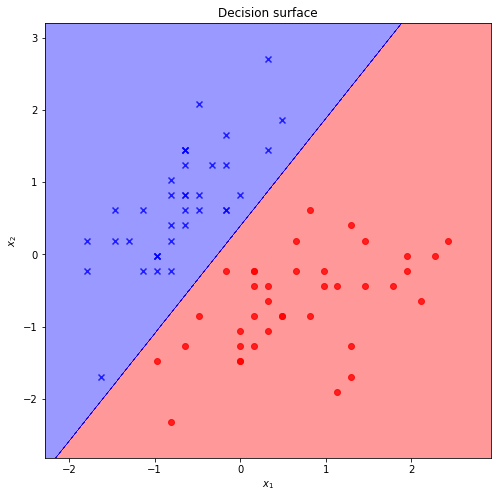

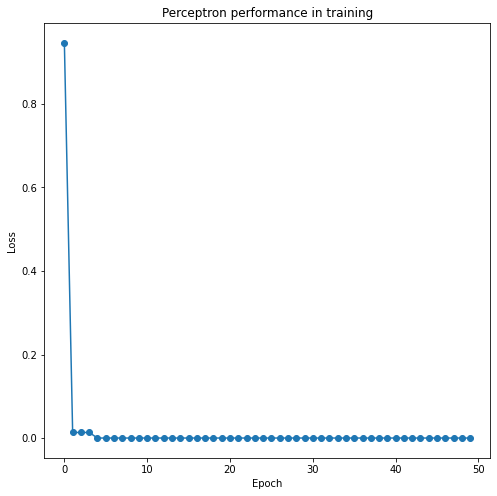

In [ ]:
# Plot perceptron performance
plot_decision_regions(X_train, y_train, h, w)
# Set figure canvas and size
fig, ax = plt.subplots(figsize=(8,8))
# Plot total loss per epoch
ax.plot(range(T), errors, marker='o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title("Perceptron performance in training")
plt.show()

w = [[-1.20470766]
 [-4.55699367]
 [ 3.06017034]]
error= 0.0


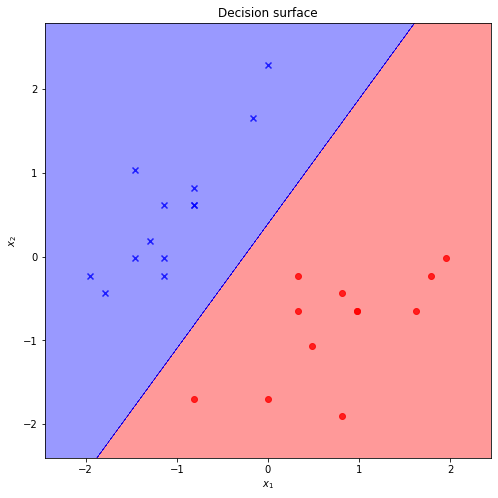

In [ ]:
# Plot perceptron performance in test 
plot_decision_regions(X_test, y_test, h, w)
print('w =', w)
error_te = L_01(h, w, X_test, y_test)
print('error=', error_te)

# 5.&nbsp;Consideraciones para datos no separables linealmente
<img src="https://drive.google.com/uc?id=1dKINhHZDkQdBDWfVo8xNK6Guc1FTYq1H" alt="mlp" width="500px">



<img src="https://drive.google.com/uc?id=1sPu803diZHP-T5DKqLIukHkUr1VObMAv" alt="mlp" width="1000px">

Fuente: [POCKET ALGORITHM](https://work.caltech.edu/library/032.pdf)

# 5.1. Ejemplo de datos no separables (dataset Iris)

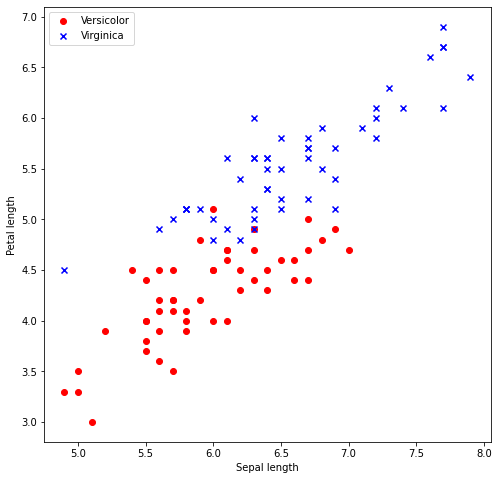

In [ ]:
# Set figure canvas and size
fig = plt.figure(figsize=(8,8))
# plot Iris Setosa samples
plt.scatter(X2[:,0], X2[:,2], color='red', marker='o', label='Versicolor')
# plot Iris Versicolour samples
plt.scatter(X3[:,0], X3[:,2], color='blue', marker='x', label='Virginica')
# show the legend
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')


# 6.&nbsp;Ingeniería de características para aprendizaje automático
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/500px-Perceptron_example.svg.png" alt="mlp" width="700px">

Fuente: [Perceptron](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Perceptron_example.svg/500px-Perceptron_example.svg.png)

* Considerar la disponibilidad de observaciones
* Considerar la complejidad del problema
* Evaluar si el modelo debe ser explicable

# 7.&nbsp;Perceptrón multicapa y aprendizaje automático *end-to-end* **bold text**

# 7.1 Arquitectura de un perceptrón
El perceptrón estudiado hasta ahora tiene la siguiente arquitectura: 

<img src="https://drive.google.com/uc?id=1lQZslwXqkjR9XJy3SE3mCdKpQoa6RGaX" alt="mlp" width="1000px">




# 7.2. Arquitectura y entrenamiento de un perceptrón multicapa (MLP)  
La anterior arquitectura puede ser generalizada a un perceptrón multicapa que presenta los siguientes componentes:

<img src="https://drive.google.com/uc?id=1VicC4bdicGeSdPw6mX5PV8EaGeJRYpPb" alt="mlp" width="1000px">

| $\Huge \textrm{Weights}$            |  $\Huge \textrm{Outputs}$    |      
|:-------------------------:|:-------------------------:|
|\begin{equation}
    \Huge
  w_{ij}^{(l)}
    \begin{cases}
      1\leq l\leq L & \text{# layers}\\
      0\leq i\leq d^{(l-1)} & \text{# inputs}\\
      1\leq j\leq d^{(l)} & \text{# outputs}
    \end{cases}       
\end{equation}  |  \begin{equation}
\Huge x_j^{(l)}=\theta\left(\sum_{i=0}^{d^{(l-1)}} w_{ij}^{(l)} x_{i}^{(l-1)}\right)
\end{equation} |


El proceso de entrenamiento de un perceptrón multicapa puede representarse de la siguiente manera:

<img src="https://drive.google.com/uc?id=14BoKxB_eP7t2OW3KXJIV3TOg1qEHUqO1" alt="mlp" width="1000px">

Objetivo:
\begin{equation}
\huge \min_{\mathbf{W}} \frac{1}{N}\sum_{i=0}^{N}\ell(h_{\mathbf{W}},\mathbf{x}_i,y_i) 
\end{equation}

# 8.&nbsp;Ejemplo de clasificación multiclase con MLP (MNIST dataset)


In [ ]:
# Load data using Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def visualize_dataset(X, y, rows=4, cols=4):
    # Plot a few of images
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharex=True, sharey=True, figsize=(cols*2,rows*2))
    k = 0
    for i in range(rows):
        for j in range(cols):
            ax[i][j].imshow(X[k], cmap=plt.cm.gray)
            ax[i][j].set_title("$y_{{{}}}$=".format(k)+str(y[k]))
            ax[i][j].set_ylabel("$x_{{{}}}$=".format(k))
            ax[i][j].set_yticks([])
            ax[i][j].set_xticks([])
            # ax[i][j].set_axis_off()
            k = k+1
    fig.suptitle("MNIST digits $(n_{{train}}={{{}}}$)".format(len(X)), fontsize=20)
    plt.show()


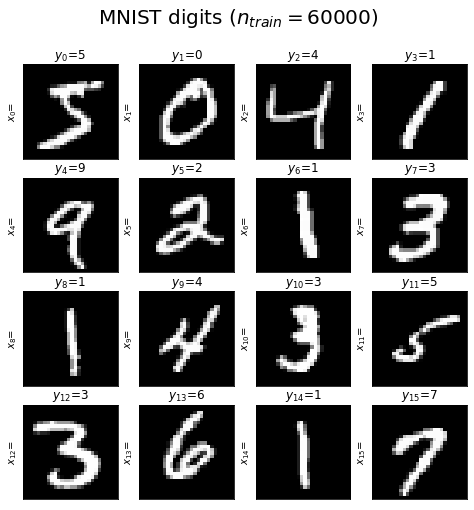

In [ ]:
# visualize random numbers
visualize_dataset(X_train, y_train, rows=4, cols=4)

In [ ]:
# PREPROCESSING 
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# reshape images to vectors
# flatten 28*28 images to a 784 vector for each image
width = X_train.shape[1]
height = X_train.shape[2]
num_pixels = width * height
X_train_vec = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test_vec = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [ ]:
X_train_vec[0,:].shape

(784,)

In [ ]:
def simple_model_regression(input_size,output_size):
    # create model
    # model = Sequential()
    model = tf.keras.models.Sequential()
    # model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(tf.keras.Input(shape=(input_size,)))
    # model.add(tf.keras.layers.Reshape((input_size,1)))
    model.add(tf.keras.layers.Dense(128, activation='tanh', kernel_initializer='normal'))
    model.add(tf.keras.layers.Dense(32, activation='tanh', kernel_initializer='normal'))
    model.add(tf.keras.layers.Dense(output_size, activation='linear', kernel_initializer='normal'))
    # model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [ ]:
# Initialization
seed = 12345
init_seed(seed)
# build the model
model_mlp_reg = simple_model_regression(input_size=num_pixels, output_size=1)
# Fit the model
model_mlp_reg.fit(X_train_vec, y_train, validation_data=(X_test_vec, y_test), epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 4s - loss: 5.2210 - root_mean_squared_error: 2.2849 - val_loss: 1.4378 - val_root_mean_squared_error: 1.1991
Epoch 2/10
600/600 - 1s - loss: 0.9647 - root_mean_squared_error: 0.9822 - val_loss: 0.8157 - val_root_mean_squared_error: 0.9032
Epoch 3/10
600/600 - 1s - loss: 0.6267 - root_mean_squared_error: 0.7917 - val_loss: 0.6223 - val_root_mean_squared_error: 0.7889
Epoch 4/10
600/600 - 1s - loss: 0.4861 - root_mean_squared_error: 0.6972 - val_loss: 0.5477 - val_root_mean_squared_error: 0.7401
Epoch 5/10
600/600 - 1s - loss: 0.4039 - root_mean_squared_error: 0.6355 - val_loss: 0.4947 - val_root_mean_squared_error: 0.7034
Epoch 6/10
600/600 - 1s - loss: 0.3398 - root_mean_squared_error: 0.5829 - val_loss: 0.4796 - val_root_mean_squared_error: 0.6925
Epoch 7/10
600/600 - 1s - loss: 0.2922 - root_mean_squared_error: 0.5406 - val_loss: 0.4615 - val_root_mean_squared_error: 0.6794
Epoch 8/10
600/600 - 1s - loss: 0.2472 - root_mean_squared_error: 0.4972 - val_loss: 0.442

h(x)= [[8.0318575]]
h(x)_(trunc)= [[8.]]
y= 8


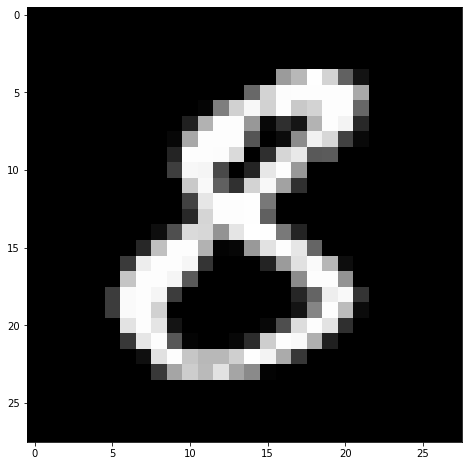

In [ ]:
k = 1234
# Print predictions
h_x = model_mlp_reg.predict(X_test_vec[[k]])
print('h(x)=', h_x)
print('h(x)_(trunc)=', np.abs(np.round(h_x)))
print('y=', y_test[k])
# Set figure canvas and size
fig = plt.figure(figsize=(8,8))
# plot Iris Setosa samples
plt.imshow(X_test[k], cmap=plt.cm.gray)

In [ ]:
# Redefinition of the loss function
# loss function
l_01 = lambda y_hat,y : y_hat.ravel() != y.ravel()
# total loss function
L_01 = lambda Y_hat,Y : np.sum(l_01(Y_hat,Y))/len(Y)

In [ ]:
# Final evaluation of the model
scores = model_mlp_reg.evaluate(X_test_vec, y_test, verbose=0)
print("Baseline Error for regression: %.2f (RMSE)" % (scores[1]))
h_X_test = model_mlp_reg.predict(X_test_vec).ravel()
h_X_test_tr = np.abs(np.round(h_X_test))
print("Error rate for regression (truncated prediction): %.2f%%" % (100*L_01(h_X_test_tr,y_test)))

Baseline Error for regression: 0.64 (RMSE)
Error rate for regression (truncated prediction): 12.46%


h= [0.39432055]
y= 9


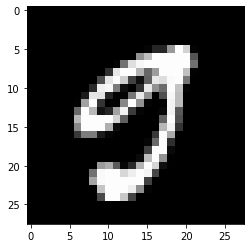

In [ ]:
# Finding the sample that generates the greatest mse
mse_error = (h_X_test-y_test)**2
j = np.argmax(mse_error)
print('h=', model_mlp_reg.predict(X_test_vec[[j]]).ravel())
print('y=', y_test[j])
# Set figure canvas and size
fig = plt.figure(figsize=(4,4))
# plot Iris Setosa samples
plt.imshow(X_test[j], cmap=plt.cm.gray)

In [ ]:
def shift_image(X, dx, dy):
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = 0
    elif dy<0:
        X[dy:, :] = 0
    if dx>0:
        X[:, :dx] = 0
    elif dx<0:
        X[:, dx:] = 0
    return X

y=9


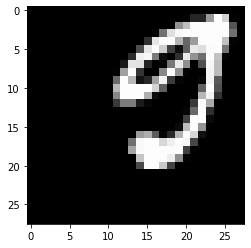

In [ ]:
x_shifted = shift_image(X_test[j], dx=5, dy=-4)
# Set figure canvas and size
fig = plt.figure(figsize=(4,4))
# plot Iris Setosa samples
plt.imshow(x_shifted, cmap=plt.cm.gray)
print('y='+str(y_test[j]))

In [ ]:
print('h=', model_mlp_reg.predict(x_shifted.reshape(1,width*height)).ravel())
print('y=', y_test[j])

h= [5.6172853]
y= 9


# 8.1. Codificación One-hot (one-hot encoding)
La mayoría de los sistemas de aprendizaje automático no son capaces de reconocer que ciertas asociaciones no están basadas en sus atributos numéricos. En otras palabras, el número 9 no es más importante que el número 1 para la tarea de clasificación de dígitos; sin embargo, numéricamente 9>1.

Para evitar que estos sistemas ponderen sus predicciones de manera inadecuada, es necesario mapear el espacio de las variables categóricas (cuyo valor no implica importancia) a uno que identifique de manera inequívoca las asociaciones. 

| $\Large y=$ | $\Large0$ | $\Large1$ | $\Large2$ | $\Large3$ | $\Large4$ | $\Large5$ | $\Large6$ | $\Large7$ | $\Large8$ | $\Large9$ |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| $\Large0\rightarrow$ | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $\Large1\rightarrow$ | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $\Large2\rightarrow$ | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| $\vdots$ |   |   |   |   |   | $\vdots$ |   |   |   |   |
| $\Large9\rightarrow$ | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 |

In [ ]:
# one-hot encode targets
y_train_enc = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_enc = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 8.2. Activación *Softmax*

La transformación del espacio de salida $\mathcal{Y}$ a través de la codificación *one-hot* convierte la tarea de predicción original en uno multivariable. Bajo estas condiciones es posible usar activaciones lineales para cada clase, sin embargo el espacio de salida es un vector compuesto de elementos binarios $y\in\{0,1\}^{K}$, donde $K$ representa el número de clases. En ese sentido, la regresión logística es un procedimiento más adecuado para modelar variables binarias (o distribuciones binomiales) y cuyo resultado puede interpretarse en términos de probabilidad. La función logística $\sigma:\mathbb{R}\rightarrow[0,1]$ puede ser escrita de la siguiente manera:
\begin{equation}
\sigma(z)=\frac{1}{1+e^{-z}}
\end{equation}
La función *Softmax* es una generalización de la función logísitica y se usa para modelar distibuciones multinomiales. Por lo tanto, la función *Softmax* $\sigma:\mathbb{R}^K\rightarrow[0,1]^{K}$ tiene la siguiente forma:
\begin{equation}
\sigma(\mathbf{z})_j=\frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}},\quad j=1,\dots,K~\text{y}~\mathbb{z}=[z_1,\dots,z_K]\in\mathbb{R}^K 
\end{equation} 
La activación *Softmax* se usa comúnmente en la capa de salida de las redes neuronales para normalizar dicha salida a una distribución de probabilidades sobre las predicciones de clases. Siguiendo nuestra notación, la capa de salida con una activación *Softmax* puede escribirse así: 
\begin{equation}
x_j^{(L)}=\sigma\left(\sum_{i=0}^{d^{(L-1)}} w_{ij}^{(L)} x_{i}^{(L-1)}\right)_j=\frac{e^{\sum\limits_{i=0}^{d^{(L-1)}} w_{ij}^{(L)} x_{i}^{(L-1)}}}{\sum\limits_{k=1}^{K} e^{\sum\limits_{i=0}^{d^{(L-1)}} w_{ik}^{(L)} x_{i}^{(L-1)}}}
\end{equation}

# 8.3. Función de costo de entropía cruzada

A diferencia de una tarea de regresión, las tareas de clasificación son diseñadas de manera que generen salidas probabilísticas a través de la activación en la capa de salida. En ese sentido, la función de costo debe cuantificar la diferencia entre distribuciones de probabilidades para una variable aleatoria dada. Una elección habitual es la entropía cruzada entre la probabilidad real $p$ y la distribución aproximada $q$ definida sobre la variable discreta $x$, cuya expresión matemática está dada por:
\begin{equation}
H(p,q) = -\sum_{\forall x} p(x)log\left(q\left(x\right)\right)
\end{equation}  
Para una red neuronal cuya salida es multiclase y probabilística $h:\mathcal{X}\rightarrow[0,1]^K$, la entropía cruzada puede aplicarse considerando $p$ como la distribución de las etiquetas $y$ y $q$ como la distribución de las predicciones $h$. Por lo tanto, la función de costo puede expresar así:
\begin{equation}
\ell_{CE}(h_{\mathbf{W}},\mathbf{x},y)=-\sum_{i=1}^K y_ilog\left(h_{\mathbf{W}}\left(\mathbf{x}\right)_i\right),
\end{equation}
donde $y_i$ denota el componente $i$-ésimo de la etiqueta codificada y $h_{\mathbf{W}}\left(\mathbf{x}\right)_i$ representa el componente $i$-ésimo del vector de probabilidades generado por $h_{\mathbf{W}}\left(\mathbf{x}\right)$.

In [ ]:
def simple_model_prob(input_size,output_size):
    # create model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(input_size,)))
    model.add(tf.keras.layers.Dense(128, activation='tanh', kernel_initializer='normal'))
    model.add(tf.keras.layers.Dense(32, activation='tanh', kernel_initializer='normal'))
    model.add(tf.keras.layers.Dense(output_size, activation='softmax', kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Initialization
seed = 12345
init_seed(seed)
# build the model
model_mlp_clf = simple_model_prob(input_size=num_pixels, output_size=10)
# Fit the model
model_mlp_clf.fit(X_train_vec, y_train_enc, validation_data=(X_test_vec, y_test_enc), epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 2s - loss: 0.4994 - accuracy: 0.8914 - val_loss: 0.2114 - val_accuracy: 0.9389
Epoch 2/10
600/600 - 2s - loss: 0.1623 - accuracy: 0.9534 - val_loss: 0.1329 - val_accuracy: 0.9609
Epoch 3/10
600/600 - 2s - loss: 0.1079 - accuracy: 0.9695 - val_loss: 0.1052 - val_accuracy: 0.9690
Epoch 4/10
600/600 - 1s - loss: 0.0774 - accuracy: 0.9777 - val_loss: 0.0906 - val_accuracy: 0.9724
Epoch 5/10
600/600 - 1s - loss: 0.0597 - accuracy: 0.9826 - val_loss: 0.0833 - val_accuracy: 0.9758
Epoch 6/10
600/600 - 1s - loss: 0.0460 - accuracy: 0.9868 - val_loss: 0.0798 - val_accuracy: 0.9751
Epoch 7/10
600/600 - 1s - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.0760 - val_accuracy: 0.9780
Epoch 8/10
600/600 - 2s - loss: 0.0278 - accuracy: 0.9924 - val_loss: 0.0778 - val_accuracy: 0.9759
Epoch 9/10
600/600 - 1s - loss: 0.0213 - accuracy: 0.9945 - val_loss: 0.0806 - val_accuracy: 0.9765
Epoch 10/10
600/600 - 1s - loss: 0.0175 - accuracy: 0.9952 - val_loss: 0.0763 - val_accuracy: 0.9773

In [ ]:
# Final evaluation of the model
scores = model_mlp_clf.evaluate(X_test_vec, y_test_enc, verbose=0)
print("Error rate for classification: %.2f%%" % (100-scores[1]*100))

Error rate for classification: 2.27%


In [ ]:
print('h(x)_MLP=', np.argmax(model_mlp_clf.predict(X_test_vec[[j]])))
print('y=', np.argmax(y_test_enc[j]))

h(x)_MLP= 5
y= 9


# 9.&nbsp;Arquitectura LeNet
La información espacial es destruida al vectorizar las imágenes. 

<img src="https://www.qmedia.jp/content/images/2018/02/MNIST_recognition.png" alt="mlp" width="800px">

Fuente: [Unsupervised Learning](https://www.qmedia.jp/rigetti-unsupervised-learning/)





Arquitectura propuesta por Yann LeCun y Yoshua Bengio busca patrones en la información bidimensional de los dígitos.
<img src="https://d2l.ai/_images/lenet.svg" alt="mlp" width="1000px">
Fuente: [Convolutional Neural Networks (LeNet)](https://d2l.ai/chapter_convolutional-neural-networks/lenet.html)

In [ ]:
def lenet_model(input_shape=(28,28), output_shape=10):
    
    model = tf.keras.Sequential()
    # input layer
    model.add(tf.keras.Input(shape=(input_shape[0],input_shape[1],1)))
    # convolutional layer 1
    model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), 
                                    strides=(1, 1), activation='tanh'))
    # average pooling layer 1
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                                strides=(2, 2)))
    # convolutional layer 2
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), 
                                    strides=(1, 1), activation='tanh'))
    # average pooling layer 2 
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                                strides=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    # fully connected
    model.add(tf.keras.layers.Dense(units=120, activation='tanh'))
    model.add(tf.keras.layers.Flatten())
    # fully connected
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
    # output layer
    model.add(tf.keras.layers.Dense(units=output_shape, activation='softmax'))
    #slightly changed from the original formulation

    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), 
                    metrics=['accuracy'])
  
    return model

In [ ]:
# Initialization
seed = 12345
init_seed(seed)
# build the model
model_cnn = lenet_model(input_shape=(width,height), output_shape=10)
# Add a new axis
X_train_ed = X_train[:, :, :, np.newaxis]
X_test_ed = X_test[:, :, :, np.newaxis]
# Fit the model
model_cnn.fit(X_train_ed, y_train_enc, validation_data=(X_test_ed, y_test_enc), epochs=10, batch_size=100, verbose=2) 

Epoch 1/10
600/600 - 3s - loss: 0.3152 - accuracy: 0.9083 - val_loss: 0.1390 - val_accuracy: 0.9592
Epoch 2/10
600/600 - 2s - loss: 0.1174 - accuracy: 0.9651 - val_loss: 0.0853 - val_accuracy: 0.9741
Epoch 3/10
600/600 - 2s - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0650 - val_accuracy: 0.9803
Epoch 4/10
600/600 - 2s - loss: 0.0592 - accuracy: 0.9821 - val_loss: 0.0557 - val_accuracy: 0.9819
Epoch 5/10
600/600 - 2s - loss: 0.0492 - accuracy: 0.9847 - val_loss: 0.0499 - val_accuracy: 0.9841
Epoch 6/10
600/600 - 2s - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0463 - val_accuracy: 0.9851
Epoch 7/10
600/600 - 2s - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0433 - val_accuracy: 0.9866
Epoch 8/10
600/600 - 2s - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 9/10
600/600 - 2s - loss: 0.0230 - accuracy: 0.9925 - val_loss: 0.0501 - val_accuracy: 0.9853
Epoch 10/10
600/600 - 2s - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0398 - val_accuracy: 0.9879

In [ ]:
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_ed, y_test_enc, verbose=0)
print("Error rate for classification: %.2f%%" % (100-scores[1]*100))

Error rate for classification: 1.21%


h(x)_MLP= 5
h(x)_CNN= 9
y= 9


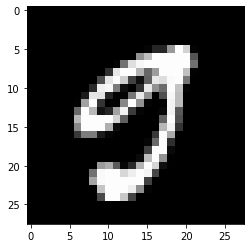

In [ ]:
print('h(x)_MLP=', np.argmax(model_mlp_clf.predict(X_test_ed[[j]].reshape(1,width*height))))
print('h(x)_CNN=', np.argmax(model_cnn.predict(X_test_ed[[j]])))
print('y=', np.argmax(y_test_enc[j]))
# Set figure canvas and size
fig = plt.figure(figsize=(4,4))
# plot MNIST sample
plt.imshow(X_test[j], cmap=plt.cm.gray)

h(x)_MLP= 5
h(x)_CNN= 9
y= 9


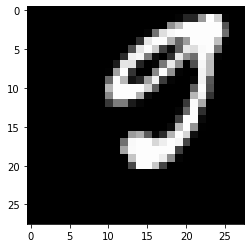

In [ ]:
# x_shifted.shape
# model_cnn.predict(x_shifted[np.newaxis,:,:,np.newaxis])
print('h(x)_MLP=', np.argmax(model_mlp_clf.predict(x_shifted.reshape(1,width*height))))
print('h(x)_CNN=', np.argmax(model_cnn.predict(x_shifted[np.newaxis,:,:,np.newaxis])))
# print('h=',model.predict(x_shifted[np.newaxis,:,:,np.newaxis]))
print('y=',y_test[j])
# Set figure canvas and size
fig = plt.figure(figsize=(4,4))
# plot MNIST sample
plt.imshow(x_shifted, cmap=plt.cm.gray)

In [ ]:
# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            width_shift_range=5, 
            height_shift_range=5)
datagen.fit(X_train_ed)

In [ ]:
# Initialization
seed = 12345
init_seed(seed)
# build the model
model_CNN = lenet_model(input_shape=(height,width), output_shape=10)
# Fit the model
model.fit(datagen.flow(X_train_ed, y_train_enc, batch_size=100), steps_per_epoch=len(X_train_ed)/100, 
                    epochs=20, validation_data=(X_test_ed, y_test_enc))

Epoch 1/20
300/300 [==============================] - 33s 109ms/step - loss: 0.7938 - accuracy: 0.7491 - val_loss: 0.1839 - val_accuracy: 0.9507
Epoch 2/20
300/300 [==============================] - 33s 110ms/step - loss: 0.2544 - accuracy: 0.9251 - val_loss: 0.1128 - val_accuracy: 0.9652
Epoch 3/20
300/300 [==============================] - 33s 110ms/step - loss: 0.1785 - accuracy: 0.9459 - val_loss: 0.0857 - val_accuracy: 0.9729
Epoch 4/20
300/300 [==============================] - 33s 109ms/step - loss: 0.1492 - accuracy: 0.9546 - val_loss: 0.0807 - val_accuracy: 0.9737
Epoch 5/20
300/300 [==============================] - 33s 110ms/step - loss: 0.1284 - accuracy: 0.9605 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 6/20
300/300 [==============================] - 33s 110ms/step - loss: 0.1153 - accuracy: 0.9646 - val_loss: 0.0660 - val_accuracy: 0.9793
Epoch 7/20
300/300 [==============================] - 33s 110ms/step - loss: 0.1048 - accuracy: 0.9681 - val_loss: 0.0650 - val_ac

In [ ]:
# x_shifted.shape
model.predict(x_shifted[np.newaxis,:,:,np.newaxis])
# np.argmax(model.predict(x_shifted[np.newaxis,:,:,np.newaxis]))
# print('h=',model.predict(x_shifted[np.newaxis,:,:,np.newaxis]))
# print('y=',y_test[j])

array([[5.1146944e-06, 2.6705347e-05, 6.1712204e-03, 6.5767902e-01,
        8.1119897e-06, 1.4983922e-02, 1.1050258e-05, 1.1560048e-03,
        3.1436014e-01, 5.5985888e-03]], dtype=float32)